## Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    classification_report,
    precision_recall_curve
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

## Basic Data Analysis

In [4]:
# Loading the dataset
cust_data = pd.read_excel("DS_Assessment.xlsx", sheet_name='Data')
cust_data.shape

(5000, 13)

In [5]:
# Creating a copy of the data
data = cust_data.copy()

In [6]:
data.head()

,ID,Age,Experience,Income,Postal Code,Family Size,CCAvgSpending,Education,Mortgage,Investment Account,Deposit Account,InternetBanking,Personal Loan
0,1,25,1,49.0,91107,4.0,1.6,Undergrad,0,1,0,NO,NO
1,2,45,19,34.0,90089,3.0,1.5,Undergrad,0,1,0,NO,NO
2,3,39,15,11.0,94720,1.0,1.0,Undergrad,0,0,0,NO,NO
3,4,35,9,NaN,94112,1.0,2.7,Graduate,0,0,0,NO,NO
4,5,35,8,45.0,91330,4.0,1.0,Graduate,0,0,0,NO,NO


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              4980 non-null   float64
 4   Postal Code         5000 non-null   int64  
 5   Family Size         4991 non-null   float64
 6   CCAvgSpending       5000 non-null   float64
 7   Education           5000 non-null   object 
 8   Mortgage            5000 non-null   int64  
 9   Investment Account  5000 non-null   int64  
 10  Deposit Account     5000 non-null   int64  
 11  InternetBanking     5000 non-null   object 
 12  Personal Loan       5000 non-null   object 
dtypes: float64(3), int64(7), object(3)
memory usage: 507.9+ KB


- We can see that there are two columns - Income and Family Size with some missing values
- Education, InternetBanking and Personal Loan are of object type, rest are numerical

In [8]:
data.duplicated().sum()

0

In [9]:
#Summary statistics of numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,4980.0,73.840361,46.079300,8.0,39.00,64.0,98.00,224.0
Postal Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family Size,4991.0,2.396714,1.148189,1.0,1.00,2.0,3.00,4.0
CCAvgSpending,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Investment Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0
Deposit Account,5000.0,0.060400,0.238250,0.0,0.00,0.0,0.00,1.0


In [10]:
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
Postal Code            467
Family Size              4
CCAvgSpending          108
Education                3
Mortgage               347
Investment Account       2
Deposit Account          2
InternetBanking          2
Personal Loan            2
dtype: int64

## Exploratory Data Analysis

### Univariate Analysis

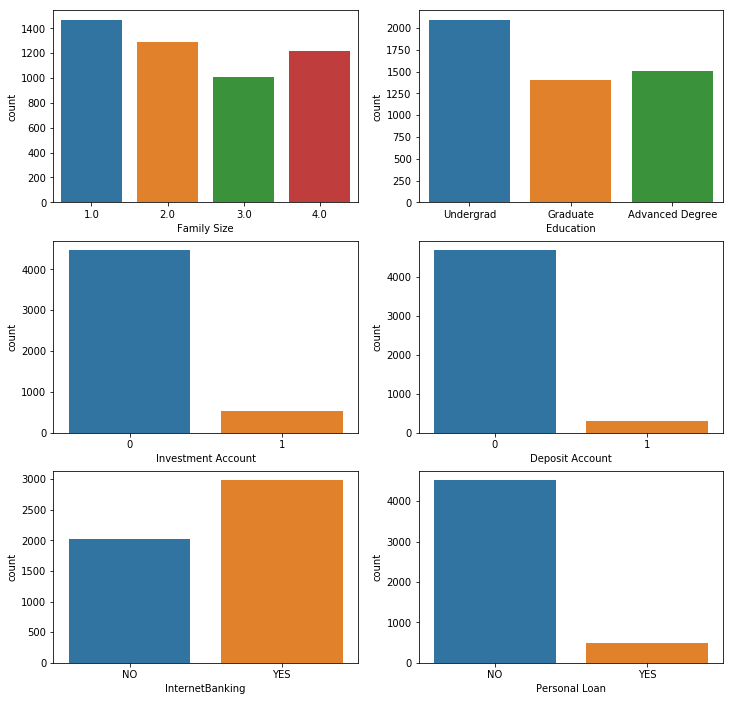

In [11]:
# Exploring discrete variables
fig, axes = plt.subplots(3,2, figsize=(12,12))
sns.countplot(x=data['Family Size'], ax=axes[0,0])
sns.countplot(x=data['Education'], ax=axes[0,1])
sns.countplot(x=data['Investment Account'], ax=axes[1,0])
sns.countplot(x=data['Deposit Account'], ax=axes[1,1])
sns.countplot(x=data['InternetBanking'], ax=axes[2,0])
sns.countplot(x=data['Personal Loan'], ax=axes[2,1])

In [12]:
#Exploring continuous variables
def hist_box(col):
    fig, axes = plt.subplots(2, figsize=(10,6))
    sns.boxplot(x = data[col], ax = axes[0], showmeans=True)
    sns.distplot(data[col], kde = True, ax = axes[1])
    plt.show()

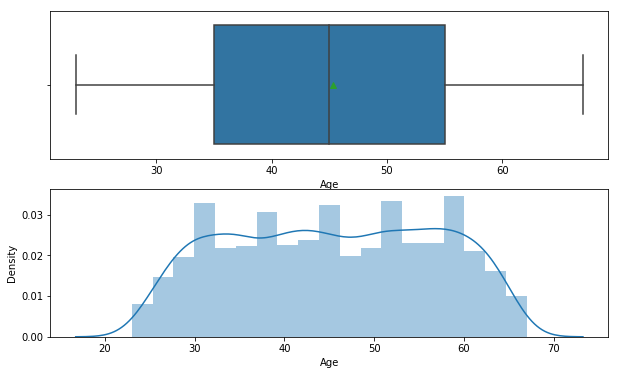

In [13]:
hist_box('Age')

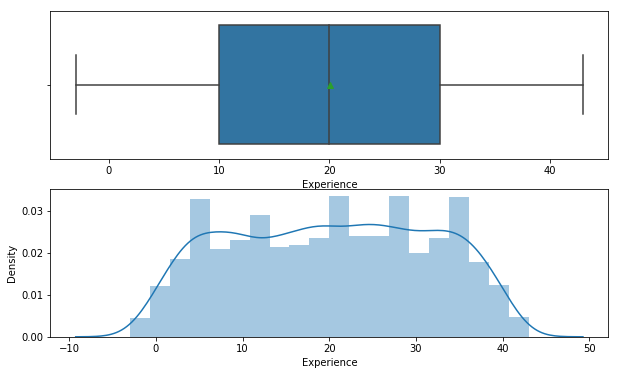

In [14]:
hist_box('Experience')

Experience has some negative values.

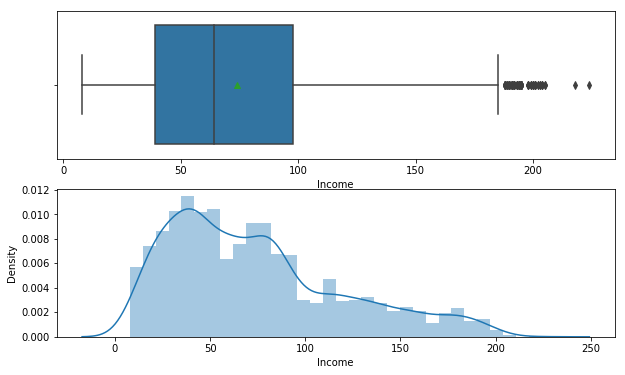

In [15]:
hist_box('Income')

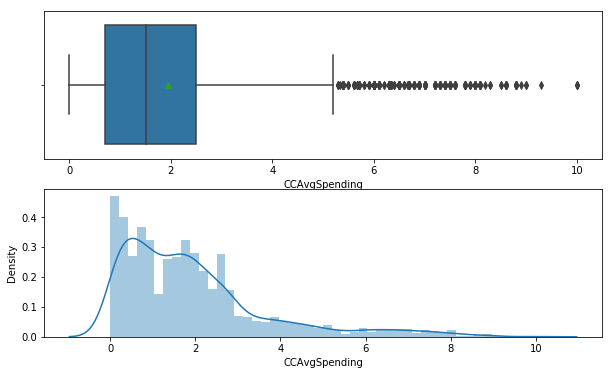

In [16]:
hist_box('CCAvgSpending')

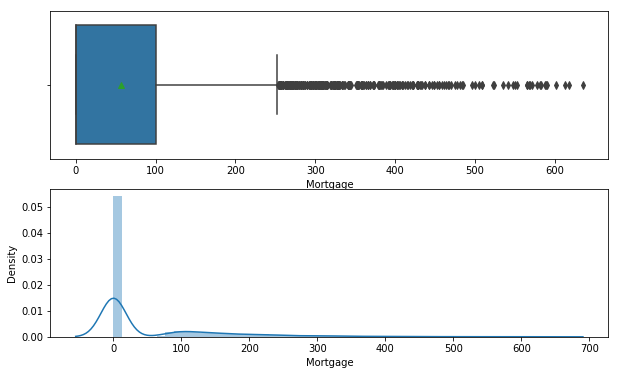

In [17]:
hist_box('Mortgage')

The above three variables are right skewed, so log transforming them

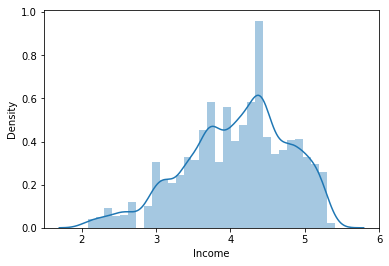

In [18]:
sns.distplot(np.log(data['Income']))

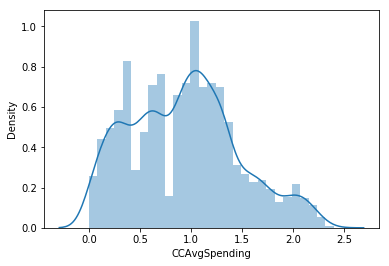

In [19]:
sns.distplot(np.log(data['CCAvgSpending']+1))

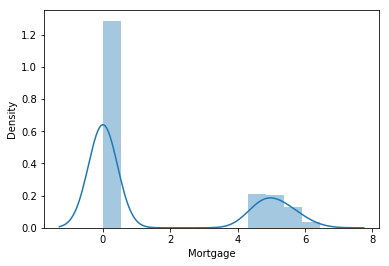

In [20]:
sns.distplot(np.log(data['Mortgage']+1))

In [21]:
data['Income_log'] = np.log(data['Income'])
data['CCAvgSpending_log'] = np.log(data['CCAvgSpending']+1)
data['Mortgage_log'] = np.log(data['Mortgage']+1)

In [22]:
data.head()

,ID,Age,Experience,Income,Postal Code,Family Size,CCAvgSpending,Education,Mortgage,Investment Account,Deposit Account,InternetBanking,Personal Loan,Income_log,CCAvgSpending_log,Mortgage_log
0,1,25,1,49.0,91107,4.0,1.6,Undergrad,0,1,0,NO,NO,3.891820,0.955511,0.0
1,2,45,19,34.0,90089,3.0,1.5,Undergrad,0,1,0,NO,NO,3.526361,0.916291,0.0
2,3,39,15,11.0,94720,1.0,1.0,Undergrad,0,0,0,NO,NO,2.397895,0.693147,0.0
3,4,35,9,NaN,94112,1.0,2.7,Graduate,0,0,0,NO,NO,NaN,1.308333,0.0
4,5,35,8,45.0,91330,4.0,1.0,Graduate,0,0,0,NO,NO,3.806662,0.693147,0.0


### Bivariate 

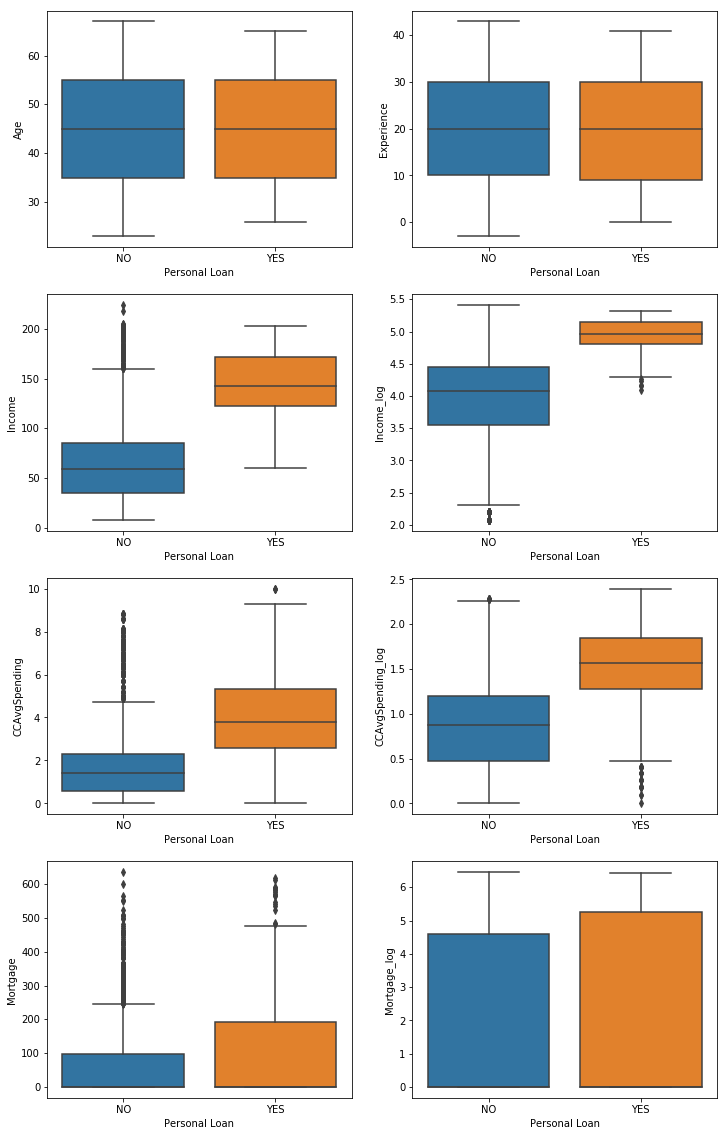

In [23]:
#Plotting boxplots for continuous variables w.r.t. target variable
fig, axes = plt.subplots(4,2, figsize=(12,20))
sns.boxplot(y=data['Age'], x=data['Personal Loan'], ax=axes[0,0])
sns.boxplot(y=data['Experience'], x=data['Personal Loan'], ax=axes[0,1])
sns.boxplot(y=data['Income'], x=data['Personal Loan'], ax=axes[1,0])
sns.boxplot(y=data['Income_log'], x=data['Personal Loan'], ax=axes[1,1])
sns.boxplot(y=data['CCAvgSpending'], x=data['Personal Loan'], ax=axes[2,0])
sns.boxplot(y=data['CCAvgSpending_log'], x=data['Personal Loan'], ax=axes[2,1])
sns.boxplot(y=data['Mortgage'], x=data['Personal Loan'], ax=axes[3,0])
sns.boxplot(y=data['Mortgage_log'], x=data['Personal Loan'], ax=axes[3,1])

Text(0,0.5,'Percent conversion %')

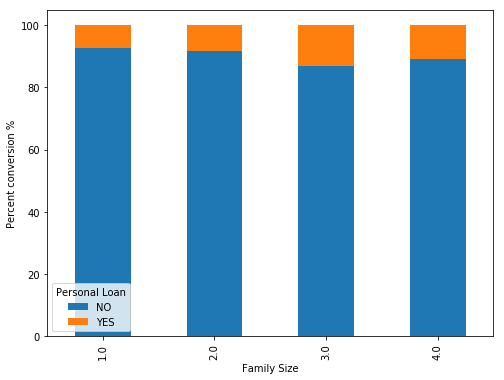

In [24]:
#Categorical variables w.r.t target
#Personal Loan flag vs Family Size
(pd.crosstab(data['Family Size'],data['Personal Loan'],normalize='index')*100).plot(kind='bar',figsize=(8,6),stacked=True)
plt.ylabel('Percent conversion %')

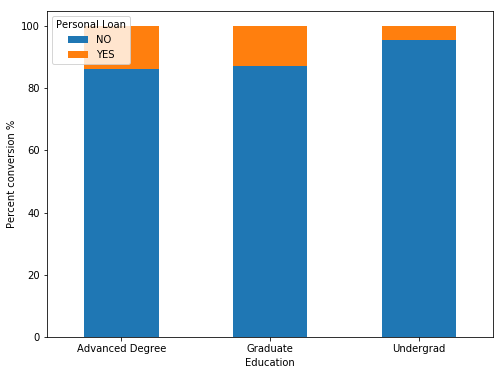

In [25]:
#Personal Loan flag vs Education
(pd.crosstab(data['Education'],data['Personal Loan'],normalize='index')*100).plot(kind='bar',figsize=(8,6),stacked=True)
plt.ylabel('Percent conversion %')
plt.xticks(rotation = 0);

Text(0,0.5,'Percent conversion %')

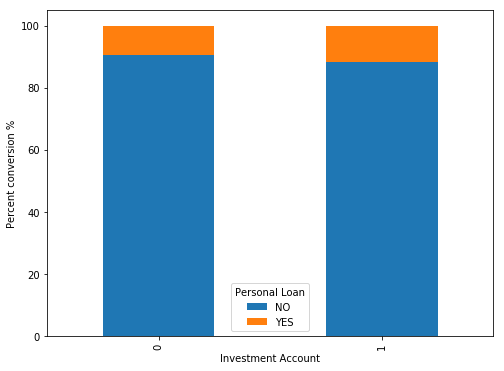

In [26]:
#Personal Loan flag vs Investment Account
(pd.crosstab(data['Investment Account'],data['Personal Loan'],normalize='index')*100).plot(kind='bar',figsize=(8,6),stacked=True)
plt.ylabel('Percent conversion %')

Text(0,0.5,'Percent conversion %')

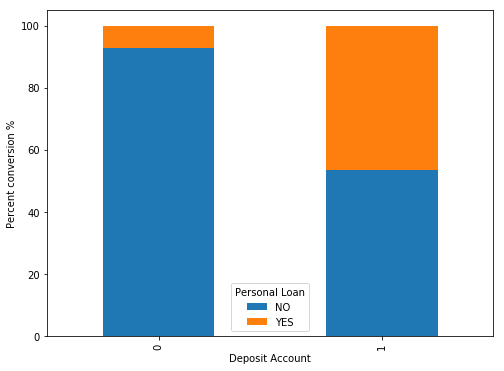

In [27]:
#Personal Loan flag vs Deposit Account
(pd.crosstab(data['Deposit Account'],data['Personal Loan'],normalize='index')*100).plot(kind='bar',figsize=(8,6),stacked=True)
plt.ylabel('Percent conversion %')

Text(0,0.5,'Percent conversion %')

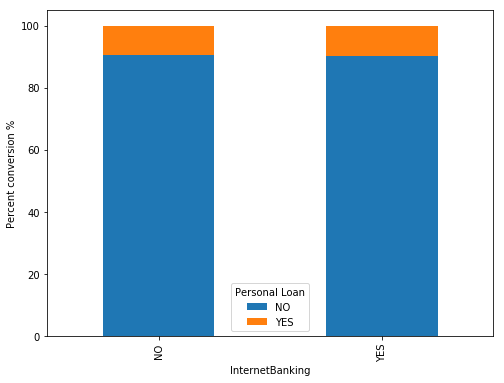

In [28]:
#Personal Loan flag vs InternetBanking
(pd.crosstab(data['InternetBanking'],data['Personal Loan'],normalize='index')*100).plot(kind='bar',figsize=(8,6),stacked=True)
plt.ylabel('Percent conversion %')

## Data Preprocessing

In [29]:
# ID will not add value to the modeling hence dropping it

data.drop(["ID"], axis=1, inplace=True)

### Encoding categorical variables

In [30]:
#As internet banking and Personal loan only has yes no values, replacing it with 1 and 0
data["InternetBanking"].replace("NO", 0, inplace=True)
data["InternetBanking"].replace("YES", 1, inplace=True)
data["Personal Loan"].replace("NO", 0, inplace=True)
data["Personal Loan"].replace("YES", 1, inplace=True)

In [31]:
# Encoding Education variable
data = pd.get_dummies(data, columns=['Education'], drop_first=True)
data.head()

,Age,Experience,Income,Postal Code,Family Size,CCAvgSpending,Mortgage,Investment Account,Deposit Account,InternetBanking,Personal Loan,Income_log,CCAvgSpending_log,Mortgage_log,Education_Graduate,Education_Undergrad
0,25,1,49.0,91107,4.0,1.6,0,1,0,0,0,3.891820,0.955511,0.0,0,1
1,45,19,34.0,90089,3.0,1.5,0,1,0,0,0,3.526361,0.916291,0.0,0,1
2,39,15,11.0,94720,1.0,1.0,0,0,0,0,0,2.397895,0.693147,0.0,0,1
3,35,9,NaN,94112,1.0,2.7,0,0,0,0,0,NaN,1.308333,0.0,1,0
4,35,8,45.0,91330,4.0,1.0,0,0,0,0,0,3.806662,0.693147,0.0,1,0


### Missing value treatment

Replacing the missing values with the median values w.r.t. the target variable.

In [32]:
data.groupby(['Personal Loan'])['Income'].median()

Personal Loan
0     59.0
1    143.0
Name: Income, dtype: float64

In [33]:
data.groupby(['Personal Loan'])['Family Size'].median()

Personal Loan
0    2.0
1    3.0
Name: Family Size, dtype: float64

In [34]:
income_indices_to_be_updated = data[data['Income'].isnull()].index
data.loc[income_indices_to_be_updated]

,Age,Experience,Income,Postal Code,Family Size,CCAvgSpending,Mortgage,Investment Account,Deposit Account,InternetBanking,Personal Loan,Income_log,CCAvgSpending_log,Mortgage_log,Education_Graduate,Education_Undergrad
3,35,9,NaN,94112,1.0,2.7,0,0,0,0,0,NaN,1.308333,0.000000,1,0
11,29,5,NaN,90277,3.0,0.1,0,0,0,1,0,NaN,0.095310,0.000000,1,0
17,42,18,NaN,94305,4.0,2.4,0,0,0,0,0,NaN,1.223775,0.000000,0,1
22,29,5,NaN,90277,1.0,1.2,260,0,0,1,0,NaN,0.788457,5.564520,0,1
115,65,40,NaN,92024,3.0,1.8,0,0,0,1,0,NaN,1.029619,0.000000,1,0
160,29,0,NaN,95819,4.0,6.5,0,0,0,0,1,NaN,2.014903,0.000000,0,0
179,62,37,NaN,91942,1.0,0.1,0,0,0,1,0,NaN,0.095310,0.000000,0,1
211,44,18,NaN,94720,1.0,0.2,0,0,0,0,0,NaN,0.182322,0.000000,0,1
224,52,27,NaN,94305,4.0,1.8,91,0,0,0,0,NaN,1.029619,4.521789,0,0
233,62,37,NaN,91320,4.0,1.7,0,0,0,1,0,NaN,0.993252,0.000000,0,1


In [35]:
# Defining a function to impute Income
def impute_col(cols):
    col = cols[0]
    loan = cols[1]

    if pd.isnull(col):
        if loan == 1:
            return 143.0
        else:
            return 59.0
    else:
        return col

In [36]:
data['Income'] = data[['Income','Personal Loan']].apply(impute_col,axis=1)

In [37]:
data['Income_log'] = np.log(data['Income'])

In [38]:
fs_indices_to_be_updated = data[data['Family Size'].isnull()].index
data.loc[fs_indices_to_be_updated]

,Age,Experience,Income,Postal Code,Family Size,CCAvgSpending,Mortgage,Investment Account,Deposit Account,InternetBanking,Personal Loan,Income_log,CCAvgSpending_log,Mortgage_log,Education_Graduate,Education_Undergrad
785,46,22,164.0,94122,NaN,7.6,0,0,1,1,0,5.099866,2.151762,0.000000,0,1
1211,61,36,131.0,92407,NaN,0.9,0,0,0,1,0,4.875197,0.641854,0.000000,0,1
1220,41,17,165.0,94143,NaN,8.0,0,0,0,1,0,5.105945,2.197225,0.000000,0,1
1488,38,12,39.0,95825,NaN,0.3,174,0,0,1,0,3.663562,0.262364,5.164786,0,1
2346,52,26,59.0,92660,NaN,1.5,239,0,0,0,0,4.077537,0.916291,5.480639,1,0
2876,24,-2,80.0,91107,NaN,1.6,238,0,0,0,0,4.382027,0.955511,5.476464,0,0
3120,35,11,75.0,94542,NaN,1.7,0,0,0,1,0,4.317488,0.993252,0.000000,1,0
4121,53,27,65.0,91711,NaN,2.8,0,0,0,0,0,4.174387,1.335001,0.000000,1,0
4621,57,32,60.0,93407,NaN,1.7,0,1,1,1,0,4.094345,0.993252,0.000000,0,1


In [39]:
#For all of them Personal Loan variable is 0, so filling them with 2
data.loc[fs_indices_to_be_updated, 'Family Size'] = 2.0

In [40]:
data.isnull().sum()

Age                    0
Experience             0
Income                 0
Postal Code            0
Family Size            0
CCAvgSpending          0
Mortgage               0
Investment Account     0
Deposit Account        0
InternetBanking        0
Personal Loan          0
Income_log             0
CCAvgSpending_log      0
Mortgage_log           0
Education_Graduate     0
Education_Undergrad    0
dtype: int64

In [41]:
# Stripping the Postal Code variable to 2 digits

data['Postal Code'] = data['Postal Code'].apply(lambda x: str(x)[0:2])

In [42]:
data['Postal Code'].value_counts()

94    1472
92     988
95     815
90     703
91     565
93     417
96      40
Name: Postal Code, dtype: int64

Text(0,0.5,'Percent conversion %')

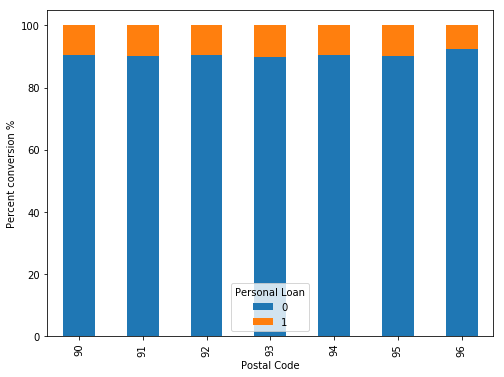

In [43]:
(pd.crosstab(data['Postal Code'],data['Personal Loan'],normalize='index')*100).plot(kind='bar',figsize=(8,6),stacked=True)
plt.ylabel('Percent conversion %')

In [44]:
# Encoding Postal Code variable
data = pd.get_dummies(data, columns=['Postal Code'], drop_first=True)

In [45]:
data.head()

,Age,Experience,Income,Family Size,CCAvgSpending,Mortgage,Investment Account,Deposit Account,InternetBanking,Personal Loan,Income_log,CCAvgSpending_log,Mortgage_log,Education_Graduate,Education_Undergrad,Postal Code_91,Postal Code_92,Postal Code_93,Postal Code_94,Postal Code_95,Postal Code_96
0,25,1,49.0,4.0,1.6,0,1,0,0,0,3.891820,0.955511,0.0,0,1,1,0,0,0,0,0
1,45,19,34.0,3.0,1.5,0,1,0,0,0,3.526361,0.916291,0.0,0,1,0,0,0,0,0,0
2,39,15,11.0,1.0,1.0,0,0,0,0,0,2.397895,0.693147,0.0,0,1,0,0,0,1,0,0
3,35,9,59.0,1.0,2.7,0,0,0,0,0,4.077537,1.308333,0.0,1,0,0,0,0,1,0,0
4,35,8,45.0,4.0,1.0,0,0,0,0,0,3.806662,0.693147,0.0,1,0,1,0,0,0,0,0


In [46]:
# Creating a new variable indicating spending to income ratio of a customer
data['spend_to_inc'] = data['CCAvgSpending']*12/data['Income']

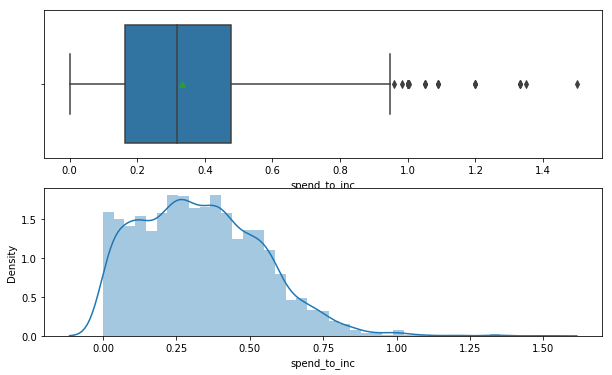

In [47]:
hist_box('spend_to_inc')

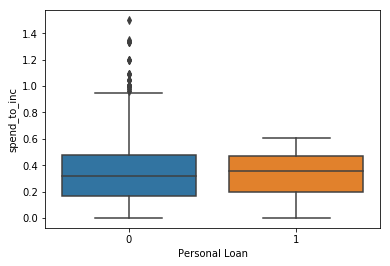

In [48]:
sns.boxplot(y=data['spend_to_inc'], x=data['Personal Loan'])

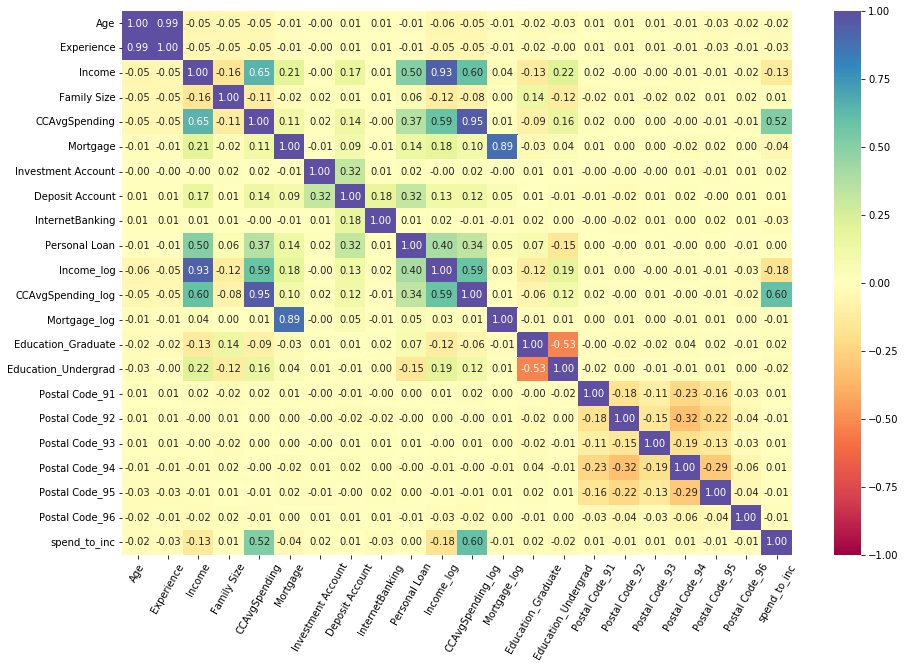

In [49]:
#checking for correlation
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.xticks(rotation=60)
plt.show()

In [50]:
# Dropping highly correlated variables
data.drop(columns=['Experience','Income','CCAvgSpending','Mortgage'],inplace=True)

In [51]:
data.head()

,Age,Family Size,Investment Account,Deposit Account,InternetBanking,Personal Loan,Income_log,CCAvgSpending_log,Mortgage_log,Education_Graduate,Education_Undergrad,Postal Code_91,Postal Code_92,Postal Code_93,Postal Code_94,Postal Code_95,Postal Code_96,spend_to_inc
0,25,4.0,1,0,0,0,3.891820,0.955511,0.0,0,1,1,0,0,0,0,0,0.391837
1,45,3.0,1,0,0,0,3.526361,0.916291,0.0,0,1,0,0,0,0,0,0,0.529412
2,39,1.0,0,0,0,0,2.397895,0.693147,0.0,0,1,0,0,0,1,0,0,1.090909
3,35,1.0,0,0,0,0,4.077537,1.308333,0.0,1,0,0,0,0,1,0,0,0.549153
4,35,4.0,0,0,0,0,3.806662,0.693147,0.0,1,0,1,0,0,0,0,0,0.266667


## Modeling

In [52]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True, fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [53]:
# Separating target variable and other variables
X = data.drop(columns=['Personal Loan'])
y = data['Personal Loan']

In [54]:
# Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1,stratify=y)

In [55]:
scaling = MinMaxScaler().fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

### Logistic Regression

In [56]:
# Fitting logistic regression model
lg = LogisticRegression(class_weight='balanced', random_state=1)
lg.fit(X_train_scaled,y_train)

LogisticRegression(class_weight='balanced', random_state=1)

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      3164
           1       0.49      0.93      0.64       336

    accuracy                           0.90      3500
   macro avg       0.74      0.91      0.79      3500
weighted avg       0.94      0.90      0.91      3500



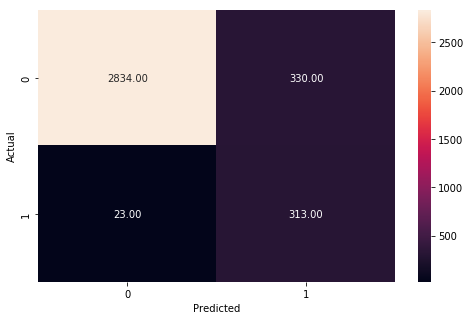

In [57]:
# Checking the performance on the training data
y_pred_train = lg.predict(X_train_scaled)
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1356
           1       0.48      0.89      0.62       144

    accuracy                           0.90      1500
   macro avg       0.73      0.89      0.78      1500
weighted avg       0.94      0.90      0.91      1500



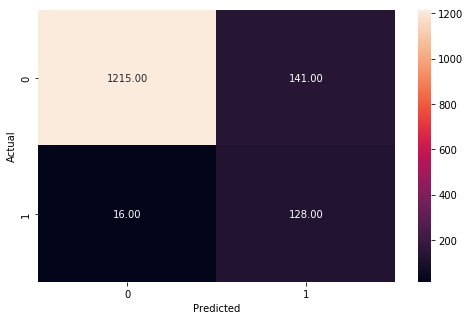

In [58]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test_scaled)
metrics_score(y_test, y_pred_test)

We can see that the Precision is quite low and Recall is high, but we want both of them to be nearly equal as we have to minimize both Type 1 and Type 2 errors.

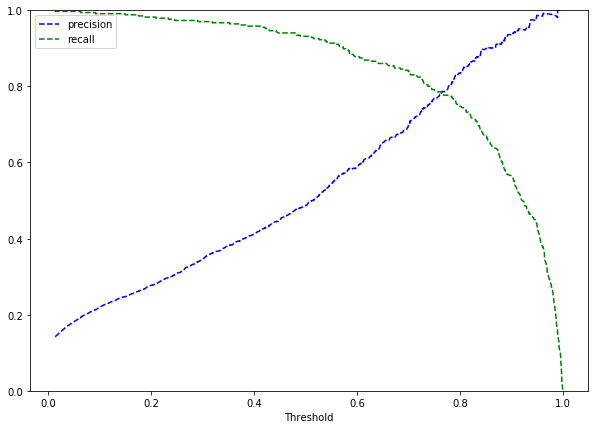

In [59]:
y_scores_lg=lg.predict_proba(X_train_scaled)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [60]:
# Calculating the exact threshold where precision and recall are equal.

for i in np.arange(len(thresholds_lg)):
    if precisions_lg[i]==recalls_lg[i]:
        print(thresholds_lg[i])

0.763636555391149


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3164
           1       0.78      0.79      0.78       336

    accuracy                           0.96      3500
   macro avg       0.88      0.88      0.88      3500
weighted avg       0.96      0.96      0.96      3500



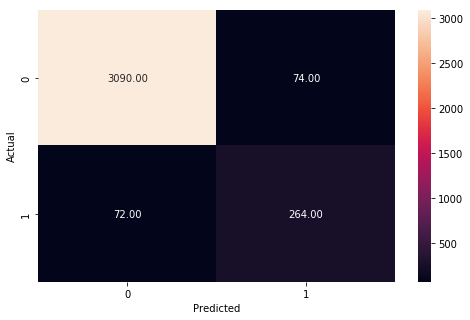

In [61]:
#performance of the model at this threshold
optimal_threshold=.763
y_pred_train = lg.predict_proba(X_train_scaled)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1356
           1       0.73      0.73      0.73       144

    accuracy                           0.95      1500
   macro avg       0.85      0.85      0.85      1500
weighted avg       0.95      0.95      0.95      1500



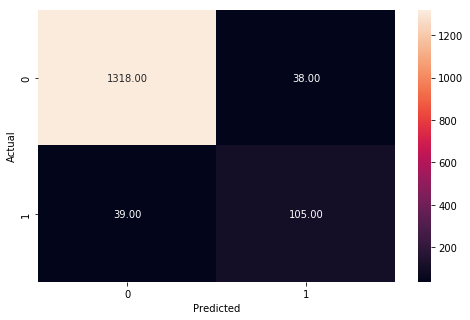

In [62]:
optimal_threshold1=.763
y_pred_test = lg.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

In [63]:
# Printing the coefficients of logistic regression

cols=X_train.columns

coef_lg=lg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by=0,ascending=False)

,0
Income_log,13.950822
CCAvgSpending_log,3.121610
Deposit Account,2.577816
Family Size,1.421073
Age,0.519178
Mortgage_log,0.319520
Education_Graduate,0.073681
Postal Code_94,-0.078655
Postal Code_95,-0.099658
Postal Code_92,-0.125763


### SVM

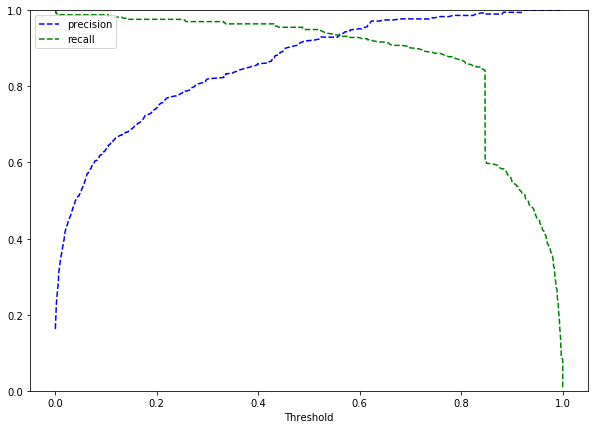

In [64]:
svm_rbf=SVC(kernel='rbf',probability=True,class_weight='balanced',random_state=1)
svm_rbf.fit(X_train_scaled,y_train)
y_scores_svm=svm_rbf.predict_proba(X_train_scaled) # Predict_proba gives the probability of each observation belonging to each class


precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [65]:
# Calculating the exact threshold where precision and recall are equal.
for i in np.arange(len(thresholds_svm)):
    if precisions_svm[i]==recalls_svm[i]:
        print(thresholds_svm[i])

0.5600483422985045


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3164
           1       0.93      0.93      0.93       336

    accuracy                           0.99      3500
   macro avg       0.96      0.96      0.96      3500
weighted avg       0.99      0.99      0.99      3500



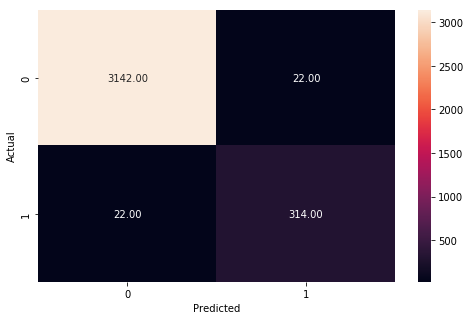

In [66]:
optimal_threshold1=0.560
y_pred_train = svm_rbf.predict_proba(X_train_scaled)

metrics_score(y_train, y_pred_train[:,1]>optimal_threshold1)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1356
           1       0.87      0.72      0.79       144

    accuracy                           0.96      1500
   macro avg       0.92      0.86      0.89      1500
weighted avg       0.96      0.96      0.96      1500



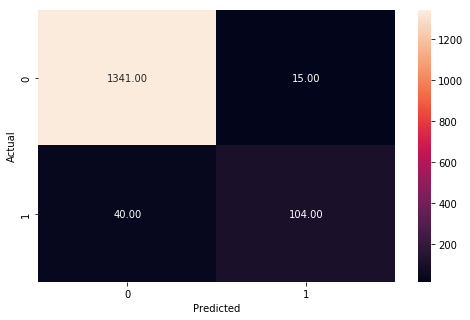

In [67]:
y_pred_test = svm_rbf.predict_proba(X_test_scaled)

metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

### Random Forest

In [68]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(n_estimators = 250, class_weight = 'balanced_subsample', random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', n_estimators=250,
                       random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3164
           1       1.00      1.00      1.00       336

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500



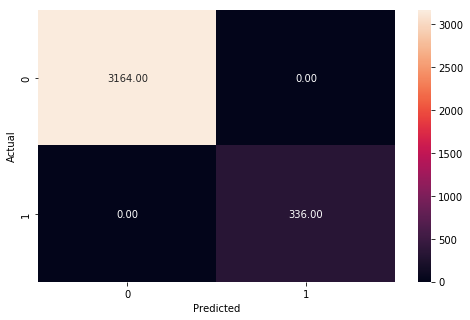

In [69]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1356
           1       0.96      0.84      0.90       144

    accuracy                           0.98      1500
   macro avg       0.97      0.92      0.94      1500
weighted avg       0.98      0.98      0.98      1500



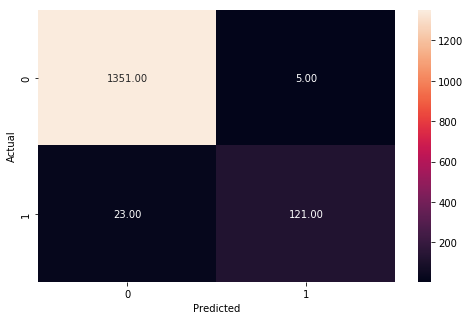

In [70]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

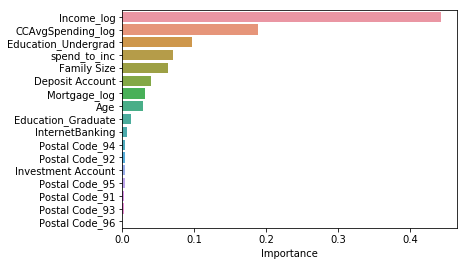

In [71]:
importances = rf_estimator.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

#plt.figure(figsize = (8, 8))

sns.barplot(importance_df.Importance, importance_df.index)

In [74]:
# Using cross validation to check the evaluation metrics
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

cv_Score11 = cross_val_score(rf_estimator, X, y, cv = cv, scoring = 'f1_macro')
cv_Score12 = cross_val_score(rf_estimator, X, y, cv = cv, scoring = 'f1_weighted')                                  

# summarize performance
print("f1_macro: %0.5f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("f1_weighted: %0.5f (+/- %0.3f)" % (cv_Score12.mean(), cv_Score12.std() * 2))

f1_macro: 0.95608 (+/- 0.030)
f1_weighted: 0.98508 (+/- 0.010)


### XGBoost

In [75]:
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [76]:
# Parameter for dealing with class imbalance
scale_pos_weight = 4520/480

[13:54:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3164
           1       1.00      1.00      1.00       336

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500



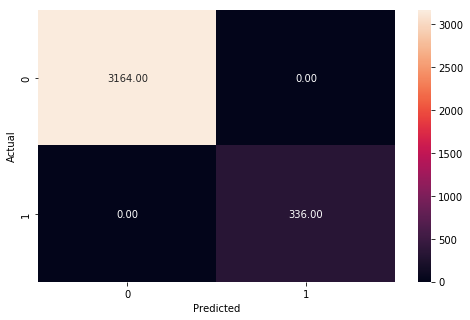

In [77]:
# Fitting the XGBoost classifier on the training data
xgb = XGBClassifier(scale_pos_weight = scale_pos_weight, n_estimators = 200, random_state = 1)
xgb.fit(X_train, y_train)

# Checking performance on the training data
y_pred_train_xgb = xgb.predict(X_train)

metrics_score(y_train, y_pred_train_xgb)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.94      0.91      0.93       144

    accuracy                           0.99      1500
   macro avg       0.97      0.95      0.96      1500
weighted avg       0.99      0.99      0.99      1500



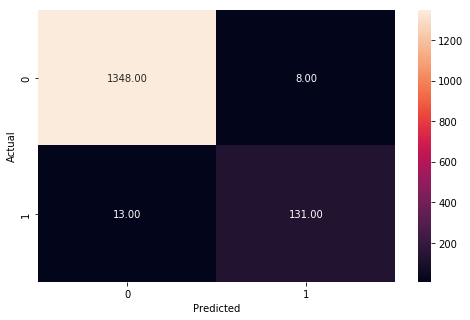

In [78]:
# Checking performance on the testing data
y_pred_test_xgb = xgb.predict(X_test)

metrics_score(y_test, y_pred_test_xgb)

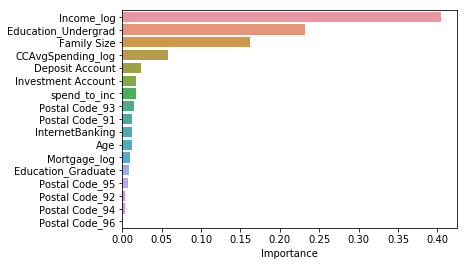

In [79]:
importances = xgb.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

#plt.figure(figsize = (8, 8))

sns.barplot(importance_df.Importance, importance_df.index)

In [80]:
# Using cross validation to check the evaluation metrics
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

cv_Score11 = cross_val_score(xgb, X, y, cv = cv, scoring = 'f1_macro')
cv_Score12 = cross_val_score(xgb, X, y, cv = cv, scoring = 'f1_weighted')                                  

# summarize performance
print("f1_macro: %0.5f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("f1_weighted: %0.5f (+/- %0.3f)" % (cv_Score12.mean(), cv_Score12.std() * 2))

[13:55:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:55:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:55:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:55:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel